# Assignment 1
### Hand-in date: Monday 2nd of March

Importing the necessary libraries and defining functions for geodata plotting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import shapefile as shp
import urllib, geojson, gdal, subprocess
import json
import requests
import folium
import datetime
import warnings
warnings.filterwarnings("ignore")

#sns.set(style= 'whitegrid', palette='pastel', color_codes=True)
#sns.mpl.rc('figure', figsize=(10,6))
# Set a plot style for nice plots.
plt.style.use('ggplot')

# Magic command useful jupyter notebook
%matplotlib inline

#Set plot size.
plt.rcParams['figure.figsize'] = [13,7]

#Set font size
plt.rcParams.update({'font.size':16})

def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0
###############################################################
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
#####################################################################        
def plot_map2(id, sf, x_lim = None, y_lim = None, figsize=(11,9)):
    '''
    Plot map with lim coordinates
    '''
   
    plt.figure(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat, 'r', linewidth=3) 
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
##########################################################        
        
def plot_map_fill(id, sf, x_lim = None, 
                          y_lim = None, 
                          figsize = (11,9), 
                          color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
        
########################################################
def plot_map_fill_multiples_ids(title, comuna, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
        
#################################################
def plot_comunas_2(sf, title, comunas, color):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        comuna_id.append(df[df.DISTRICT == i.upper()]
                         .index.get_values()[0])
    plot_map_fill_multiples_ids(title, comuna_id, sf, 
                                       x_lim = None, 
                                       y_lim = None, 
                                       figsize = (11,9), 
                                       color = color);

################################################    
def calc_color(data, color=None):
        if color == 1: 
            color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0',
                        '#807dbaF0','#6a51a3F0','#54278fF0']; 
            colors = 'Purples';
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4',
                        '#1d91c0','#225ea8','#253494']; 
            colors = 'YlGnBu';
        elif color == 3: 
            color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd',
                        '#969696','#636363','#252525']; 
            colors = 'Greys';
        elif color == 9: 
            color_sq = ['#ff0000','#ff0000','#ff0000',
                        '#ff0000','#ff0000','#ff0000']
        else:
            color_sq = ['#ffffd4','#fee391','#fec44f',
                        '#fe9929','#d95f0e','#993404']; 
            colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;    
    
    
###############################################
def plot_comunas_data(sf, title, comunas, data=None, 
                      color=None, print_id=False):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        i = i.upper()
        comuna_id.append(df[df.DISTRICT == 
                            i.upper()].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, comuna_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));
    
##########################################################
def plot_map_fill_multiples_ids_tone(sf, title, comuna,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')        
        for id in comuna:
            shape_ex = sf.shape(id)
            x_lon = np.zeros((len(shape_ex.points),1))
            y_lat = np.zeros((len(shape_ex.points),1))
            for ip in range(len(shape_ex.points)):
                x_lon[ip] = shape_ex.points[ip][0]
                y_lat[ip] = shape_ex.points[ip][1]
            ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
            if print_id != False:
                x0 = np.mean(x_lon)
                y0 = np.mean(y_lat)
                plt.text(x0, y0, id, fontsize=10)
        if (x_lim != None) & (y_lim != None):     
            plt.xlim(x_lim)
            plt.ylim(y_lim)

In [2]:
df = pd.read_csv(r'C:\Users\ander\Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
df['Time'] = pd.to_datetime(df['Time'],errors='coerce')

mask = (df['Date'] > '2003-01-01') & (df['Date'] <= '2017-12-31')
df_03_17 = df.loc[mask]




In [3]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [4]:
df_focus = df_03_17[df_03_17['Category'].isin(focuscrimes)]
df_drugs = df_03_17[df_03_17['Category'] == 'DRUG/NARCOTIC']

## Part 1: Temporal patterns

## Part 2: Thinking about data and visualization

## Part 3: Generating important plot types

### Jitter plot

The dataframe 'df_03_17' is the dataframe in which we have only included data between 2003 and 2017. We then restrict ourselves to data pertaining to Larceny/Theft crimes between January 2003 and June 2003, and between 13:00 and 14:00.

In [5]:
# Extracting a sub-dataframe only containing LARCENY/THEFT crimes
df_theft = df_03_17[df_03_17['Category'] == 'LARCENY/THEFT']

In [6]:
# Only looking at 6 months worth of data, between January 2003 and June 2003
mask = (df_theft['Date'] > '2003-01-01') & (df_theft['Date'] <= '2003-06-30')
df_theftmonth = df_theft.loc[mask]

In [7]:
# Only looking at data between 13:00 and 14:00
mask = (df_theftmonth['Time'] > '13:00:00') & (df_theftmonth['Time'] <= '14:00:00')
df_theft_sorted = df_theftmonth.loc[mask]

In [8]:
# Converting the column in the dataframe containing the time of recorded crime to a workable datatime structure
df_theft_sorted.Time = df_theft_sorted.Time.dt.time

In [9]:
# Setting the time column as the index in the dataframe
df_theft_sorted.set_index('Time',inplace = True)

In [10]:
# Extracting these times as the x axis in our jitter plot, and creating random jitter as our y-axis
x = df_theft_sorted.index.to_list()
y = np.random.ranf(len(df_theft_sorted))

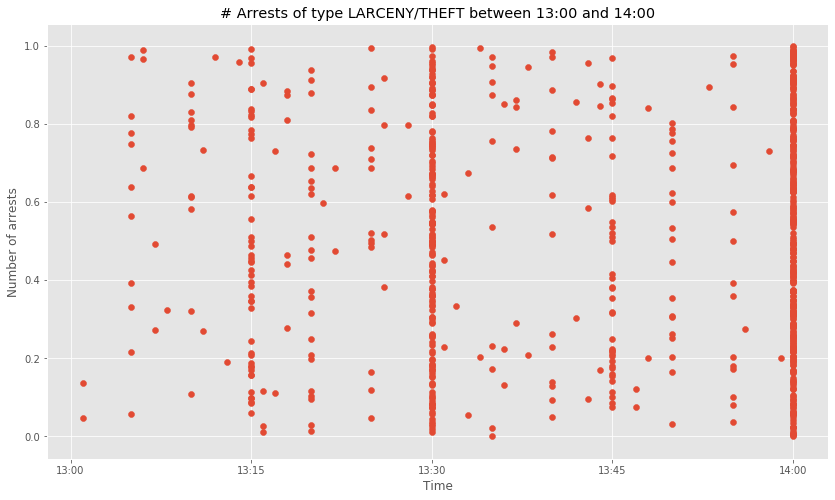

In [11]:
# Using plt.scatter to plot the jitter plot
fig = plt.figure(figsize=(14,8))
plt.scatter(x,y)
plt.title('# Arrests of type LARCENY/THEFT between 13:00 and 14:00');
plt.xlabel('Time')
plt.ylabel('Number of arrests')
plt.xticks(['13:00','13:15','13:30','13:45','14:00']);  
#fig.autofmt_xdate(0)

In the plot above, we can see a high amount of Larceny/Theft crimes being reported with a fixed 15min interval, with an even higher density at 13:30 and 14:00. As such, the hypothesis that police officers are prone to round the arrest time can cleraly be seen.

### Histograms
Choosing Narcotics and Vehicle Theft as crime types and looking at their histograms

In [12]:
# Creating two dataframes, in which the relevant crime type is extracted
df_GTA = df_03_17[df_03_17['Category'] == 'VEHICLE THEFT']
df_Drugs = df_03_17[df_03_17['Category'] == 'DRUG/NARCOTIC']

In [50]:
# Extracting only six months of data from January 2003 to June 2003 in each dataframe
mask = (df_GTA['Date'] > '2003-01-01') & (df_GTA['Date'] <= '2003-06-01')
df_GTAsort = df_GTA.loc[mask]
mask = (df_Drugs['Date'] > '2003-01-01') & (df_Drugs['Date'] <= '2003-06-01')
df_Drugssort = df_Drugs.loc[mask]

In [51]:
# Extracting a list of the latitude column from each dataframe
lats_drugs = df_Drugssort.Y.to_list()
lats_thefts = df_GTAsort.Y.to_list()

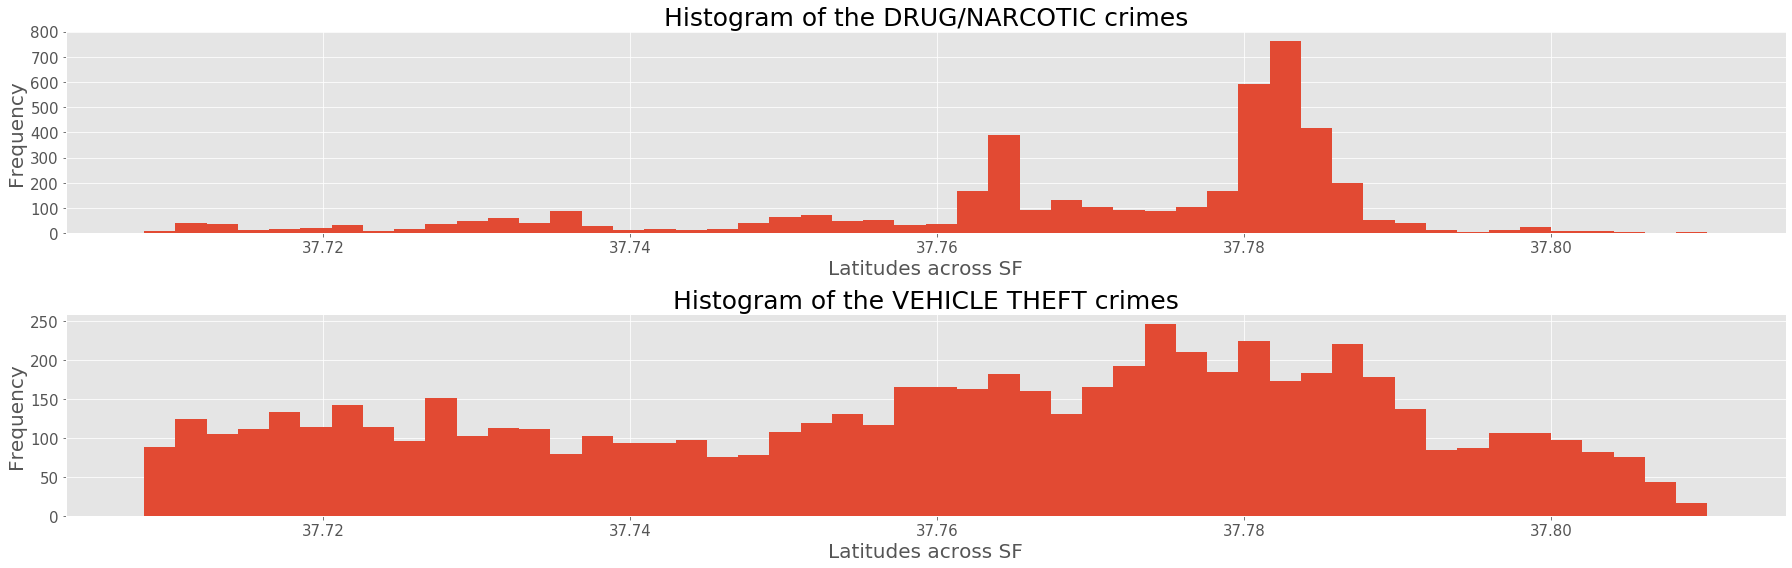

In [57]:
# Plotting the two histograms.
plt.figure(figsize=(25,8))
plt.subplot(2,1,1)
hist_drugs = plt.hist(lats_drugs,bins = 50)
plt.xlabel('Latitudes across SF',fontsize = 20)
plt.xticks(fontsize=15)
plt.ylabel('Frequency',fontsize = 20)
plt.yticks(fontsize=15)
plt.title('Histogram of the DRUG/NARCOTIC crimes',fontsize = 25)

plt.subplot(2,1,2)
hist_thefts = plt.hist(lats_thefts, bins = 50)
plt.xlabel('Latitudes across SF',fontsize = 20)
plt.xticks(fontsize=15) 
plt.ylabel('Frequency',fontsize = 20)
plt.yticks(fontsize=15)
plt.title('Histogram of the VEHICLE THEFT crimes', fontsize = 25)

plt.tight_layout()
plt.show()

Looking at the two histograms, we can see an almost gaussian like behaviour in the Drug/Narcotic data, centered around aprroximately 37.785. However, we can also see a peak around 37.765, which indicates that we cannot model this using an assumption of gaussian distributed data.

The histogram for the Vehicle theft crimes can be seen to be somewhat constant all over the city, with a slight increase around 37.785, the same area in which the Drug/Narcotic crimes peak. So, based on these two primitive visualization tools, we can see that the two crimes are comitted more in that area.

## Kernel Density Estimates

In [17]:
# Here, we extract the index of the sorted dataframe, which contains the time of arrests of type Larceny/Theft
x = df_theft_sorted.index.to_list()

In [20]:
# We convert the datetimes to strings, which we then split up, such that we can sum the total number of seconds since a 
# crime occured since midnight. Then we offset, such that 
k = [str(x) for x in df_theft_sorted.index]
t = [sum(x * int(t) for x, t in zip([3600,60,1],elem.split(':'))) for elem in k]

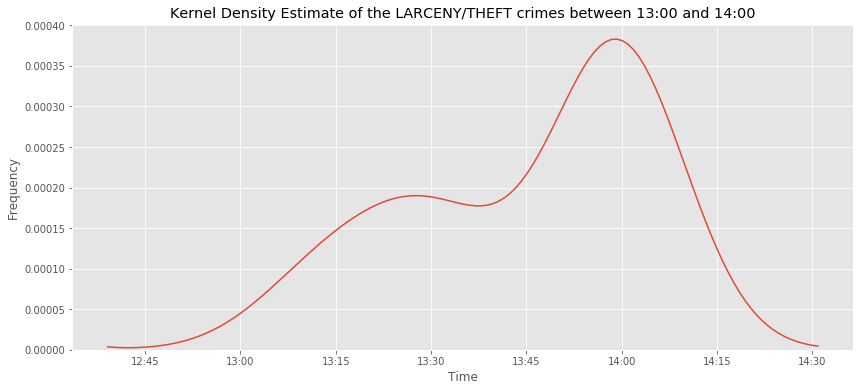

In [65]:
# Plotting the Kernel Density Estimate using sns.kdeplot
plt.figure(figsize=(14,6))
sns.kdeplot(t);
plt.xlabel('Time');
plt.ylabel('Frequency');
plt.xticks([45900,46800, 47700, 48600, 49500, 50400, 51300,52200], ['12:45','13:00','13:15','13:30','13:45','14:00','14:15','14:30']) # CRUCIAL LINE
plt.title('Kernel Density Estimate of the LARCENY/THEFT crimes between 13:00 and 14:00');

Here, we can also see, same as the jitter plot, the structure of rounding the arrest times to nearest quarter/half hour. However, as the KDE attempts to fit a gaussian kernel to the data, the underlying structure becomes blurred, and specifically the 13:15 and 13:45 arrest times, if one only looked at this plot, would be hard to notice.

Drawing 25 random samples from the time of crimes from the data frame and plotting the KDE of that

In [59]:
x_rand = df_theft_sorted.sample(25).index.to_list()

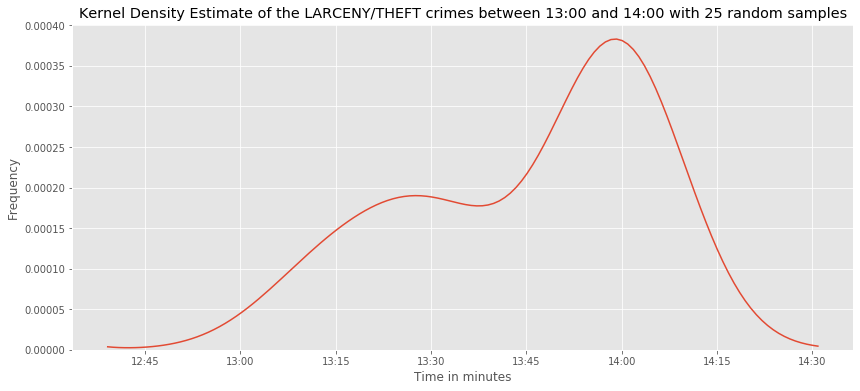

In [67]:
# Same procedure as above
k = [str(x) for x in x_rand]
t = [sum(x * int(t) for x, t in zip([3600,60,1],elem.split(':'))) for elem in k]
plt.figure(figsize=(14,6))
sns.kdeplot(t);
plt.xlabel('Time in minutes');
plt.xticks([45900,46800, 47700, 48600, 49500, 50400, 51300,52200], ['12:45','13:00','13:15','13:30','13:45','14:00','14:15','14:30']) # CRUCIAL LINE
plt.ylabel('Frequency');
plt.title('Kernel Density Estimate of the LARCENY/THEFT crimes between 13:00 and 14:00 with 25 random samples');

As seen in the plot above, the KDE becomes very smoothed out, when the number of samples used is decreased. This makes the underlying structure even harder to see, even with little data. One should therefore exercise caution when attempting to conclude something from the KDE plot, when there is introduced such a large amount of human bias.

## Part 4: Heatmaps of geodata

## Part 5: Errors in the data. The importance of looking at raw (or close to raw) data.